In [1]:
# Supress Warnings
import warnings
warnings.filterwarnings('ignore')

In [56]:
#Importing required packages
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

import statsmodels
import statsmodels.api as sm
import sklearn
from sklearn.model_selection import train_test_split

1 : Loading and Cleaning Data
1.1 Import Data


# Adjusting so as to see all the rows and columns
pd.set_option('display.max_rows', 500)
pd.set_option('display.max_columns', 500)

In [57]:
# Loading the data using Pandas
df=pd.read_csv("D:\IIIT-Upgrad\Leads.csv")
df

,Prospect ID,Lead Number,Lead Origin,Lead Source,Do Not Email,Do Not Call,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,...,Get updates on DM Content,Lead Profile,City,Asymmetrique Activity Index,Asymmetrique Profile Index,Asymmetrique Activity Score,Asymmetrique Profile Score,I agree to pay the amount through cheque,A free copy of Mastering The Interview,Last Notable Activity
0,7927b2df-8bba-4d29-b9a2-b6e0beafe620,660737,API,Olark Chat,No,No,0,0.0,0,0.00,...,No,Select,Select,02.Medium,02.Medium,15.0,15.0,No,No,Modified
1,2a272436-5132-4136-86fa-dcc88c88f482,660728,API,Organic Search,No,No,0,5.0,674,2.50,...,No,Select,Select,02.Medium,02.Medium,15.0,15.0,No,No,Email Opened
2,8cc8c611-a219-4f35-ad23-fdfd2656bd8a,660727,Landing Page Submission,Direct Traffic,No,No,1,2.0,1532,2.00,...,No,Potential Lead,Mumbai,02.Medium,01.High,14.0,20.0,No,Yes,Email Opened
3,0cc2df48-7cf4-4e39-9de9-19797f9b38cc,660719,Landing Page Submission,Direct Traffic,No,No,0,1.0,305,1.00,...,No,Select,Mumbai,02.Medium,01.High,13.0,17.0,No,No,Modified
4,3256f628-e534-4826-9d63-4a8b88782852,660681,Landing Page Submission,Google,No,No,1,2.0,1428,1.00,...,No,Select,Mumbai,02.Medium,01.High,15.0,18.0,No,No,Modified
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9235,19d6451e-fcd6-407c-b83b-48e1af805ea9,579564,Landing Page Submission,Direct Traffic,Yes,No,1,8.0,1845,2.67,...,No,Potential Lead,Mumbai,02.Medium,01.High,15.0,17.0,No,No,Email Marked Spam
9236,82a7005b-7196-4d56-95ce-a79f937a158d,579546,Landing Page Submission,Direct Traffic,No,No,0,2.0,238,2.00,...,No,Potential Lead,Mumbai,02.Medium,01.High,14.0,19.0,No,Yes,SMS Sent
9237,aac550fe-a586-452d-8d3c-f1b62c94e02c,579545,Landing Page Submission,Direct Traffic,Yes,No,0,2.0,199,2.00,...,No,Potential Lead,Mumbai,02.Medium,01.High,13.0,20.0,No,Yes,SMS Sent
9238,5330a7d1-2f2b-4df4-85d6-64ca2f6b95b9,579538,Landing Page Submission,Google,No,No,1,3.0,499,3.00,...,No,NaN,Other Metro Cities,02.Medium,02.Medium,15.0,16.0,No,No,SMS Sent


INSPECTING THE DATAFRAME

In [58]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9240 entries, 0 to 9239
Data columns (total 37 columns):
 #   Column                                         Non-Null Count  Dtype  
---  ------                                         --------------  -----  
 0   Prospect ID                                    9240 non-null   object 
 1   Lead Number                                    9240 non-null   int64  
 2   Lead Origin                                    9240 non-null   object 
 3   Lead Source                                    9204 non-null   object 
 4   Do Not Email                                   9240 non-null   object 
 5   Do Not Call                                    9240 non-null   object 
 6   Converted                                      9240 non-null   int64  
 7   TotalVisits                                    9103 non-null   float64
 8   Total Time Spent on Website                    9240 non-null   int64  
 9   Page Views Per Visit                           9103 

In [59]:
df.head()

,Prospect ID,Lead Number,Lead Origin,Lead Source,Do Not Email,Do Not Call,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,...,Get updates on DM Content,Lead Profile,City,Asymmetrique Activity Index,Asymmetrique Profile Index,Asymmetrique Activity Score,Asymmetrique Profile Score,I agree to pay the amount through cheque,A free copy of Mastering The Interview,Last Notable Activity
0,7927b2df-8bba-4d29-b9a2-b6e0beafe620,660737,API,Olark Chat,No,No,0,0.0,0,0.0,...,No,Select,Select,02.Medium,02.Medium,15.0,15.0,No,No,Modified
1,2a272436-5132-4136-86fa-dcc88c88f482,660728,API,Organic Search,No,No,0,5.0,674,2.5,...,No,Select,Select,02.Medium,02.Medium,15.0,15.0,No,No,Email Opened
2,8cc8c611-a219-4f35-ad23-fdfd2656bd8a,660727,Landing Page Submission,Direct Traffic,No,No,1,2.0,1532,2.0,...,No,Potential Lead,Mumbai,02.Medium,01.High,14.0,20.0,No,Yes,Email Opened
3,0cc2df48-7cf4-4e39-9de9-19797f9b38cc,660719,Landing Page Submission,Direct Traffic,No,No,0,1.0,305,1.0,...,No,Select,Mumbai,02.Medium,01.High,13.0,17.0,No,No,Modified
4,3256f628-e534-4826-9d63-4a8b88782852,660681,Landing Page Submission,Google,No,No,1,2.0,1428,1.0,...,No,Select,Mumbai,02.Medium,01.High,15.0,18.0,No,No,Modified


In [60]:
# The .shape code gives the no. of rows and columns
df.shape

(9240, 37)

In [61]:
#To get an idea of the numeric values, use .describe()
df.describe()

,Lead Number,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Asymmetrique Activity Score,Asymmetrique Profile Score
count,9240.000000,9240.000000,9103.000000,9240.000000,9103.000000,5022.000000,5022.000000
mean,617188.435606,0.385390,3.445238,487.698268,2.362820,14.306252,16.344883
std,23405.995698,0.486714,4.854853,548.021466,2.161418,1.386694,1.811395
min,579533.000000,0.000000,0.000000,0.000000,0.000000,7.000000,11.000000
25%,596484.500000,0.000000,1.000000,12.000000,1.000000,14.000000,15.000000
50%,615479.000000,0.000000,3.000000,248.000000,2.000000,14.000000,16.000000
75%,637387.250000,1.000000,5.000000,936.000000,3.000000,15.000000,18.000000
max,660737.000000,1.000000,251.000000,2272.000000,55.000000,18.000000,20.000000


1.3 Cleaning the dataframe

In [62]:
# Converting all the values to lower case
df = df.applymap(lambda s:s.lower() if type(s) == str else s)

In [63]:
# Replacing 'Select' with NaN (Since it means no option is selected)
df = df.replace('select',np.nan)


In [64]:
df.nunique()

Prospect ID                                      9240
Lead Number                                      9240
Lead Origin                                         5
Lead Source                                        20
Do Not Email                                        2
Do Not Call                                         2
Converted                                           2
TotalVisits                                        41
Total Time Spent on Website                      1731
Page Views Per Visit                              114
Last Activity                                      17
Country                                            38
Specialization                                     18
How did you hear about X Education                  9
What is your current occupation                     6
What matters most to you in choosing a course       3
Search                                              2
Magazine                                            1
Newspaper Article           

In [65]:
# dropping unique value columns
df.drop(columns=['I agree to pay the amount through cheque','Get updates on DM Content','Update me on Supply Chain Content',
                 'Receive More Updates About Our Courses','Magazine'],axis =1,inplace = True)

In [66]:
#check for duplicates
sum(df.duplicated(subset = 'Prospect ID')) == 0

True

In [67]:
#check for duplicates
sum(df.duplicated(subset = 'Lead Number')) == 0

True

In [69]:
#Converting 'Select' values to NaN.

df = df.replace('Select', np.nan)

In [70]:
#checking null values in each rows

df.isnull().sum()

Prospect ID                                         0
Lead Number                                         0
Lead Origin                                         0
Lead Source                                        36
Do Not Email                                        0
Do Not Call                                         0
Converted                                           0
TotalVisits                                       137
Total Time Spent on Website                         0
Page Views Per Visit                              137
Last Activity                                     103
Country                                          2461
Specialization                                   3380
How did you hear about X Education               7250
What is your current occupation                  2690
What matters most to you in choosing a course    2709
Search                                              0
Newspaper Article                                   0
X Education Forums          

In [71]:
#checking percentage of null values in each column

round(100*(df.isnull().sum()/len(df.index)), 2)

Prospect ID                                       0.00
Lead Number                                       0.00
Lead Origin                                       0.00
Lead Source                                       0.39
Do Not Email                                      0.00
Do Not Call                                       0.00
Converted                                         0.00
TotalVisits                                       1.48
Total Time Spent on Website                       0.00
Page Views Per Visit                              1.48
Last Activity                                     1.11
Country                                          26.63
Specialization                                   36.58
How did you hear about X Education               78.46
What is your current occupation                  29.11
What matters most to you in choosing a course    29.32
Search                                            0.00
Newspaper Article                                 0.00
X Educatio

In [72]:
#checking percentage of null values in each column

round(100*(df.isnull().sum()/len(df.index)))

Prospect ID                                       0.0
Lead Number                                       0.0
Lead Origin                                       0.0
Lead Source                                       0.0
Do Not Email                                      0.0
Do Not Call                                       0.0
Converted                                         0.0
TotalVisits                                       1.0
Total Time Spent on Website                       0.0
Page Views Per Visit                              1.0
Last Activity                                     1.0
Country                                          27.0
Specialization                                   37.0
How did you hear about X Education               78.0
What is your current occupation                  29.0
What matters most to you in choosing a course    29.0
Search                                            0.0
Newspaper Article                                 0.0
X Education Forums          

In [73]:
# columns having more than 35% missing values in current application column
null_col = df.columns[(df.isnull().mean()*100)>= 35]
null_col

Index(['Specialization', 'How did you hear about X Education', 'Tags',
       'Lead Quality', 'Lead Profile', 'City', 'Asymmetrique Activity Index',
       'Asymmetrique Profile Index', 'Asymmetrique Activity Score',
       'Asymmetrique Profile Score'],
      dtype='object')

In [74]:
# dropping the columns
df.drop(columns = null_col,inplace = True)

In [75]:
# checking the shape again
df.shape

(9240, 22)

In [76]:
# dealing with rest of the null columns
(df.isnull().mean()*100).sort_values(ascending = False)

What matters most to you in choosing a course    29.318182
What is your current occupation                  29.112554
Country                                          26.634199
TotalVisits                                       1.482684
Page Views Per Visit                              1.482684
Last Activity                                     1.114719
Lead Source                                       0.389610
Search                                            0.000000
A free copy of Mastering The Interview            0.000000
Through Recommendations                           0.000000
Digital Advertisement                             0.000000
Newspaper                                         0.000000
X Education Forums                                0.000000
Newspaper Article                                 0.000000
Prospect ID                                       0.000000
Lead Number                                       0.000000
Total Time Spent on Website                       0.0000

In [77]:
# filling na with "Not Available"
df['What matters most to you in choosing a course'].fillna(value="Not Available", inplace=True)
df['What is your current occupation'].fillna(value="Not Available", inplace=True)
df['Country'].fillna(value="Not Available", inplace=True)

Categorical Attributes Analysis

In [78]:
#checking value counts of Country column

df['Country'].value_counts()


india                   6492
Not Available           2461
united states             69
united arab emirates      53
singapore                 24
saudi arabia              21
united kingdom            15
australia                 13
qatar                     10
bahrain                    7
hong kong                  7
oman                       6
france                     6
unknown                    5
kuwait                     4
south africa               4
canada                     4
nigeria                    4
germany                    4
sweden                     3
philippines                2
uganda                     2
italy                      2
bangladesh                 2
netherlands                2
asia/pacific region        2
china                      2
belgium                    2
ghana                      2
kenya                      1
sri lanka                  1
tanzania                   1
malaysia                   1
liberia                    1
switzerland   

In [79]:

# rectifying the spelling
df['Lead Source']=df['Lead Source'].replace('google','Google')

In [33]:
def slots(x):
    category = ""
    if x == "India":
        category = "India"
    elif x == "not provided":
        category = "not provided"
    else:
        category = "outside india"
    return category

df['Country'] = df.apply(lambda x:slots(x['Country']), axis = 1)
df['Country'].value_counts()

outside india    9240
Name: Country, dtype: int64

In [34]:
# Since India is the most common occurence among the non-missing values we can impute all not provided values with India

df['Country'] = df['Country'].replace('not provided','India')
df['Country'].value_counts()

outside india    9240
Name: Country, dtype: int64

In [35]:
# Checking the percent of lose if the null values are removed
round(100*(sum(df.isnull().sum(axis=1) > 1)/df.shape[0]),2)

49.76

In [36]:
df = df[df.isnull().sum(axis=1) <1]

In [38]:
# Rechecking the percentage of missing values
round((df.isnull().sum()/len(df.index))*100, 2)

Prospect ID                                      0.0
Lead Number                                      0.0
Lead Origin                                      0.0
Lead Source                                      0.0
Do Not Email                                     0.0
Do Not Call                                      0.0
Converted                                        0.0
TotalVisits                                      0.0
Total Time Spent on Website                      0.0
Page Views Per Visit                             0.0
Last Activity                                    0.0
Country                                          0.0
Specialization                                   0.0
What is your current occupation                  0.0
What matters most to you in choosing a course    0.0
Search                                           0.0
Magazine                                         0.0
Newspaper Article                                0.0
X Education Forums                            

In [39]:
df.shape

(3885, 30)

In [80]:
# checking Lead source
df['Lead Source'].value_counts()

Google               2873
direct traffic       2543
olark chat           1755
organic search       1154
reference             534
welingak website      142
referral sites        125
facebook               55
bing                    6
click2call              4
social media            2
live chat               2
press_release           2
pay per click ads       1
blog                    1
welearn                 1
welearnblog_home        1
youtubechannel          1
testone                 1
nc_edm                  1
Name: Lead Source, dtype: int64

In [81]:
# dealing with rest of the null columns
(df.isnull().mean()*100).sort_values(ascending = False)

TotalVisits                                      1.482684
Page Views Per Visit                             1.482684
Last Activity                                    1.114719
Lead Source                                      0.389610
Prospect ID                                      0.000000
What matters most to you in choosing a course    0.000000
A free copy of Mastering The Interview           0.000000
Through Recommendations                          0.000000
Digital Advertisement                            0.000000
Newspaper                                        0.000000
X Education Forums                               0.000000
Newspaper Article                                0.000000
Search                                           0.000000
Country                                          0.000000
What is your current occupation                  0.000000
Lead Number                                      0.000000
Total Time Spent on Website                      0.000000
Converted     

Rest of the columns only make 1% so it can be removed

In [82]:
df =  df[~df['TotalVisits'].isnull()]
df =  df[~df['Page Views Per Visit'].isnull()]
df =  df[~df['Last Activity'].isnull()]
df =  df[~df['Lead Source'].isnull()]

In [83]:
# checking the null values
df.isnull().sum()

Prospect ID                                      0
Lead Number                                      0
Lead Origin                                      0
Lead Source                                      0
Do Not Email                                     0
Do Not Call                                      0
Converted                                        0
TotalVisits                                      0
Total Time Spent on Website                      0
Page Views Per Visit                             0
Last Activity                                    0
Country                                          0
What is your current occupation                  0
What matters most to you in choosing a course    0
Search                                           0
Newspaper Article                                0
X Education Forums                               0
Newspaper                                        0
Digital Advertisement                            0
Through Recommendations        

In [ ]:
#Now there are no null values

In [84]:
df.shape # shape after removing the null values

(9074, 22)

In [85]:
df.head()

,Prospect ID,Lead Number,Lead Origin,Lead Source,Do Not Email,Do Not Call,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,...,What is your current occupation,What matters most to you in choosing a course,Search,Newspaper Article,X Education Forums,Newspaper,Digital Advertisement,Through Recommendations,A free copy of Mastering The Interview,Last Notable Activity
0,7927b2df-8bba-4d29-b9a2-b6e0beafe620,660737,api,olark chat,no,no,0,0.0,0,0.0,...,unemployed,better career prospects,no,no,no,no,no,no,no,modified
1,2a272436-5132-4136-86fa-dcc88c88f482,660728,api,organic search,no,no,0,5.0,674,2.5,...,unemployed,better career prospects,no,no,no,no,no,no,no,email opened
2,8cc8c611-a219-4f35-ad23-fdfd2656bd8a,660727,landing page submission,direct traffic,no,no,1,2.0,1532,2.0,...,student,better career prospects,no,no,no,no,no,no,yes,email opened
3,0cc2df48-7cf4-4e39-9de9-19797f9b38cc,660719,landing page submission,direct traffic,no,no,0,1.0,305,1.0,...,unemployed,better career prospects,no,no,no,no,no,no,no,modified
4,3256f628-e534-4826-9d63-4a8b88782852,660681,landing page submission,Google,no,no,1,2.0,1428,1.0,...,unemployed,better career prospects,no,no,no,no,no,no,no,modified


In [86]:
## dropping Prospect ID,Lead Number because they are unique and not useful in the analysis
df.drop(columns=['Prospect ID','Lead Number'],axis = 1, inplace = True)

In [87]:
# lets check if they are in proper type or not
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 9074 entries, 0 to 9239
Data columns (total 20 columns):
 #   Column                                         Non-Null Count  Dtype  
---  ------                                         --------------  -----  
 0   Lead Origin                                    9074 non-null   object 
 1   Lead Source                                    9074 non-null   object 
 2   Do Not Email                                   9074 non-null   object 
 3   Do Not Call                                    9074 non-null   object 
 4   Converted                                      9074 non-null   int64  
 5   TotalVisits                                    9074 non-null   float64
 6   Total Time Spent on Website                    9074 non-null   int64  
 7   Page Views Per Visit                           9074 non-null   float64
 8   Last Activity                                  9074 non-null   object 
 9   Country                                        9074 

STEP 3 DATA ANALYSIS

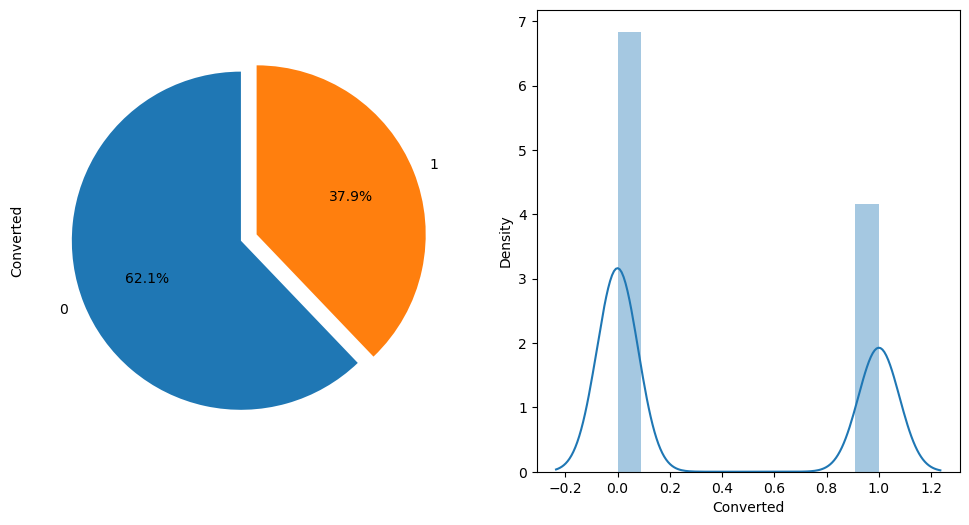

In [88]:
#Checking Data Imbalance
#Plotting a piechart to check the count value of Leads
plt.figure(figsize=[12,6])
plt.subplot(1,2,1)
df.Converted.value_counts().plot.pie(explode=[0,0.1],autopct='%1.1f%%',startangle=90)
plt.subplot(1,2,2)
sns.distplot(df.Converted,kde=True)
plt.show()

Hence we can say that around 39% of the leads are converted whereas 61% of the leads area not converted

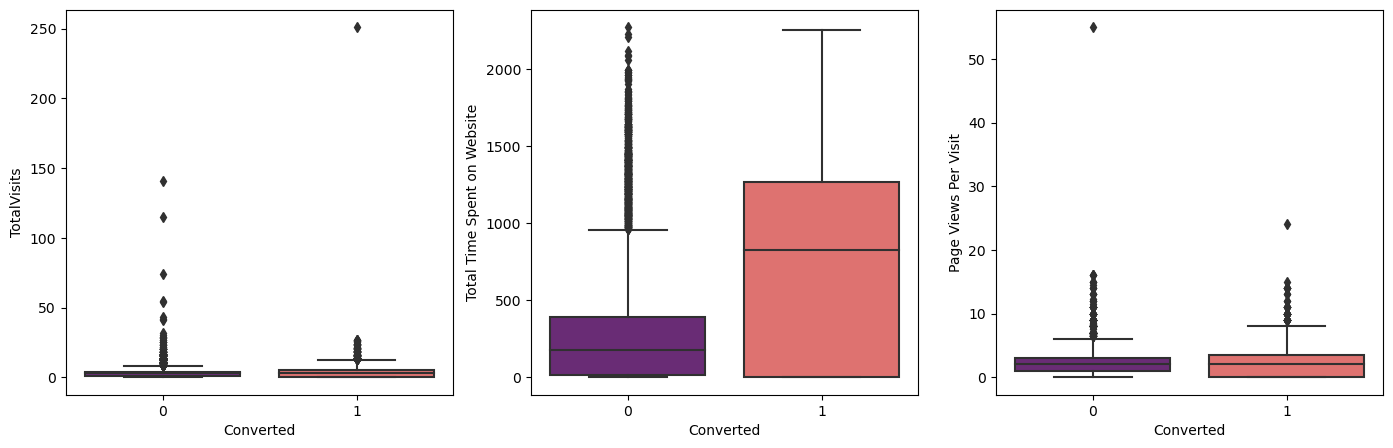

In [97]:
num_col=['TotalVisits','Total Time Spent on Website','Page Views Per Visit']
col_num=1
plt.figure(figsize=[17,5])
for i in num_col:
    plt.subplot(1,3,col_num)
    sns.boxplot(y=i,x="Converted",data=df,palette='magma')
    col_num+=1
    
plt.show()  

The median for page views per visit is almost the same for leads who are converted and not converted.
We can see people spending more time on the website are more prone to get converted.
There are equal chances for leads getting converted as per their TotalVisits

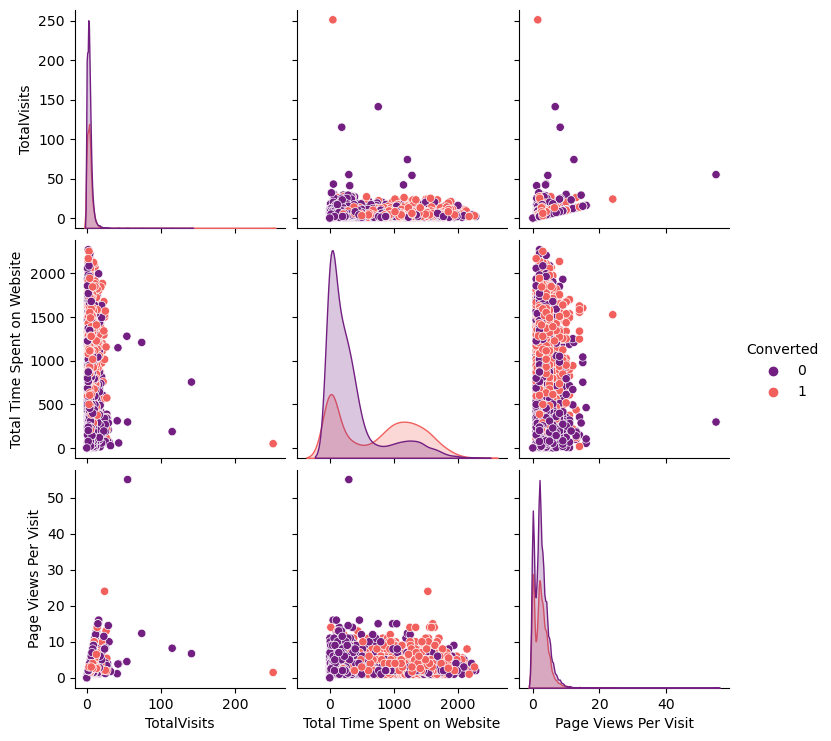

In [98]:
# Analysis on Numerical columns
sns.pairplot(df,diag_kind='kde',hue='Converted',palette='magma')
plt.show()

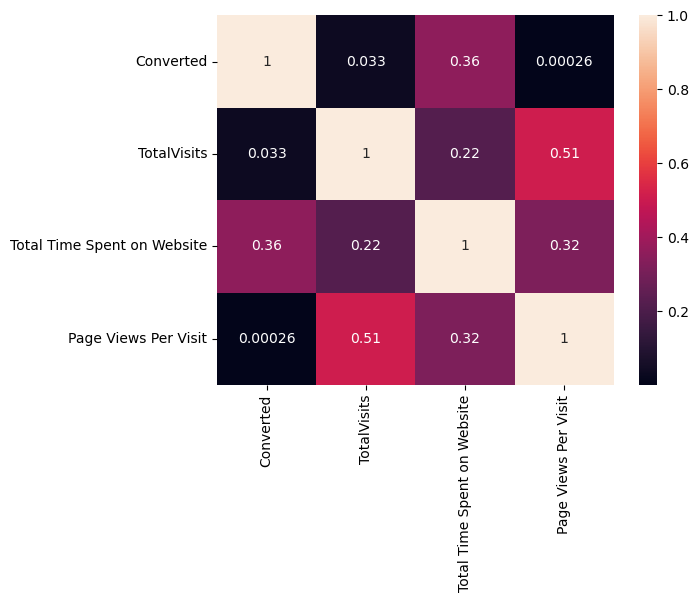

In [99]:
#Plotting a heatmap for numerical variables
sns.heatmap(df.corr(),annot=True)
plt.show()

There is relatively a higher corelation for total visits and page views per visit. We shall further break it down and then check

STEP 3 DATA PREPARATION

Creating summy variables

In [100]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 9074 entries, 0 to 9239
Data columns (total 20 columns):
 #   Column                                         Non-Null Count  Dtype  
---  ------                                         --------------  -----  
 0   Lead Origin                                    9074 non-null   object 
 1   Lead Source                                    9074 non-null   object 
 2   Do Not Email                                   9074 non-null   object 
 3   Do Not Call                                    9074 non-null   object 
 4   Converted                                      9074 non-null   int64  
 5   TotalVisits                                    9074 non-null   float64
 6   Total Time Spent on Website                    9074 non-null   int64  
 7   Page Views Per Visit                           9074 non-null   float64
 8   Last Activity                                  9074 non-null   object 
 9   Country                                        9074 

In [101]:
df.loc[:, df.dtypes == 'object'].columns

Index(['Lead Origin', 'Lead Source', 'Do Not Email', 'Do Not Call',
       'Last Activity', 'Country', 'What is your current occupation',
       'What matters most to you in choosing a course', 'Search',
       'Newspaper Article', 'X Education Forums', 'Newspaper',
       'Digital Advertisement', 'Through Recommendations',
       'A free copy of Mastering The Interview', 'Last Notable Activity'],
      dtype='object')

In [102]:
# Creating dummy variables 
dummy1 = pd.get_dummies(df[['Lead Origin', 'Lead Source', 'Do Not Email', 'Do Not Call',
       'Last Activity', 'Country', 'What is your current occupation',
       'What matters most to you in choosing a course', 'Search',
       'Newspaper Article', 'X Education Forums', 'Newspaper',
       'Digital Advertisement', 'Through Recommendations',
       'A free copy of Mastering The Interview', 'Last Notable Activity']])

# adding it to the final dataframe
df = pd.concat([df,dummy1],axis = 1)
df.head()

# dropping the columns from final df
df.drop(columns = ['Lead Origin', 'Lead Source', 'Do Not Email', 'Do Not Call',
       'Last Activity', 'Country', 'What is your current occupation',
       'What matters most to you in choosing a course', 'Search',
       'Newspaper Article', 'X Education Forums', 'Newspaper',
       'Digital Advertisement', 'Through Recommendations',
       'A free copy of Mastering The Interview', 'Last Notable Activity'],axis = 1,inplace = True )

In [103]:
df.head()

,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Lead Origin_api,Lead Origin_landing page submission,Lead Origin_lead add form,Lead Origin_lead import,Lead Source_Google,Lead Source_bing,...,Last Notable Activity_form submitted on website,Last Notable Activity_had a phone conversation,Last Notable Activity_modified,Last Notable Activity_olark chat conversation,Last Notable Activity_page visited on website,Last Notable Activity_resubscribed to emails,Last Notable Activity_sms sent,Last Notable Activity_unreachable,Last Notable Activity_unsubscribed,Last Notable Activity_view in browser link clicked
0,0,0.0,0,0.0,1,0,0,0,0,0,...,0,0,1,0,0,0,0,0,0,0
1,0,5.0,674,2.5,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,1,2.0,1532,2.0,0,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,1.0,305,1.0,0,1,0,0,0,0,...,0,0,1,0,0,0,0,0,0,0
4,1,2.0,1428,1.0,0,1,0,0,1,0,...,0,0,1,0,0,0,0,0,0,0


In [104]:
df.shape

(9074, 129)

STEP 4 : TEST-TRAIN SPLIT

In [105]:
from sklearn.model_selection import train_test_split

In [106]:
df.head()

,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Lead Origin_api,Lead Origin_landing page submission,Lead Origin_lead add form,Lead Origin_lead import,Lead Source_Google,Lead Source_bing,...,Last Notable Activity_form submitted on website,Last Notable Activity_had a phone conversation,Last Notable Activity_modified,Last Notable Activity_olark chat conversation,Last Notable Activity_page visited on website,Last Notable Activity_resubscribed to emails,Last Notable Activity_sms sent,Last Notable Activity_unreachable,Last Notable Activity_unsubscribed,Last Notable Activity_view in browser link clicked
0,0,0.0,0,0.0,1,0,0,0,0,0,...,0,0,1,0,0,0,0,0,0,0
1,0,5.0,674,2.5,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,1,2.0,1532,2.0,0,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,1.0,305,1.0,0,1,0,0,0,0,...,0,0,1,0,0,0,0,0,0,0
4,1,2.0,1428,1.0,0,1,0,0,1,0,...,0,0,1,0,0,0,0,0,0,0


In [107]:
# Putting feature variable to X
X = df.drop(['Converted'], axis=1)

X.head()

,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Lead Origin_api,Lead Origin_landing page submission,Lead Origin_lead add form,Lead Origin_lead import,Lead Source_Google,Lead Source_bing,Lead Source_blog,...,Last Notable Activity_form submitted on website,Last Notable Activity_had a phone conversation,Last Notable Activity_modified,Last Notable Activity_olark chat conversation,Last Notable Activity_page visited on website,Last Notable Activity_resubscribed to emails,Last Notable Activity_sms sent,Last Notable Activity_unreachable,Last Notable Activity_unsubscribed,Last Notable Activity_view in browser link clicked
0,0.0,0,0.0,1,0,0,0,0,0,0,...,0,0,1,0,0,0,0,0,0,0
1,5.0,674,2.5,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,2.0,1532,2.0,0,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,1.0,305,1.0,0,1,0,0,0,0,0,...,0,0,1,0,0,0,0,0,0,0
4,2.0,1428,1.0,0,1,0,0,1,0,0,...,0,0,1,0,0,0,0,0,0,0


In [108]:
# Putting response variable to y
y = df['Converted']

y.head()

0    0
1    0
2    1
3    0
4    1
Name: Converted, dtype: int64

In [112]:
# Splitting the data into train and test
X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=0.7, test_size=0.3, random_state=100)

Feature Scaling

In [113]:
from sklearn.preprocessing import StandardScaler

In [114]:
scaler = StandardScaler()

X_train[['TotalVisits','Total Time Spent on Website','Page Views Per Visit']] = scaler.fit_transform(X_train[['TotalVisits','Total Time Spent on Website','Page Views Per Visit']])

X_train.head()

,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Lead Origin_api,Lead Origin_landing page submission,Lead Origin_lead add form,Lead Origin_lead import,Lead Source_Google,Lead Source_bing,Lead Source_blog,...,Last Notable Activity_form submitted on website,Last Notable Activity_had a phone conversation,Last Notable Activity_modified,Last Notable Activity_olark chat conversation,Last Notable Activity_page visited on website,Last Notable Activity_resubscribed to emails,Last Notable Activity_sms sent,Last Notable Activity_unreachable,Last Notable Activity_unsubscribed,Last Notable Activity_view in browser link clicked
3009,-0.284595,-0.160255,-0.179666,0,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1012,-0.284595,-0.540048,-0.179666,0,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
9226,-0.671384,-0.888650,-1.132538,1,0,0,0,0,0,0,...,0,0,1,0,0,0,0,0,0,0
4750,-0.284595,1.643304,-0.179666,0,1,0,0,0,0,0,...,0,0,0,0,0,0,1,0,0,0
7987,0.295588,2.017593,0.058552,0,1,0,0,0,0,0,...,0,0,1,0,0,0,0,0,0,0


In [115]:
### Checking the Conversion Rate
converted = (sum(df['Converted'])/len(df['Converted'].index))*100
converted

37.85541106458012

We have almost 38% conversion rate

Looking at the correlation

In [116]:
# Importing matplotlib and seaborn
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

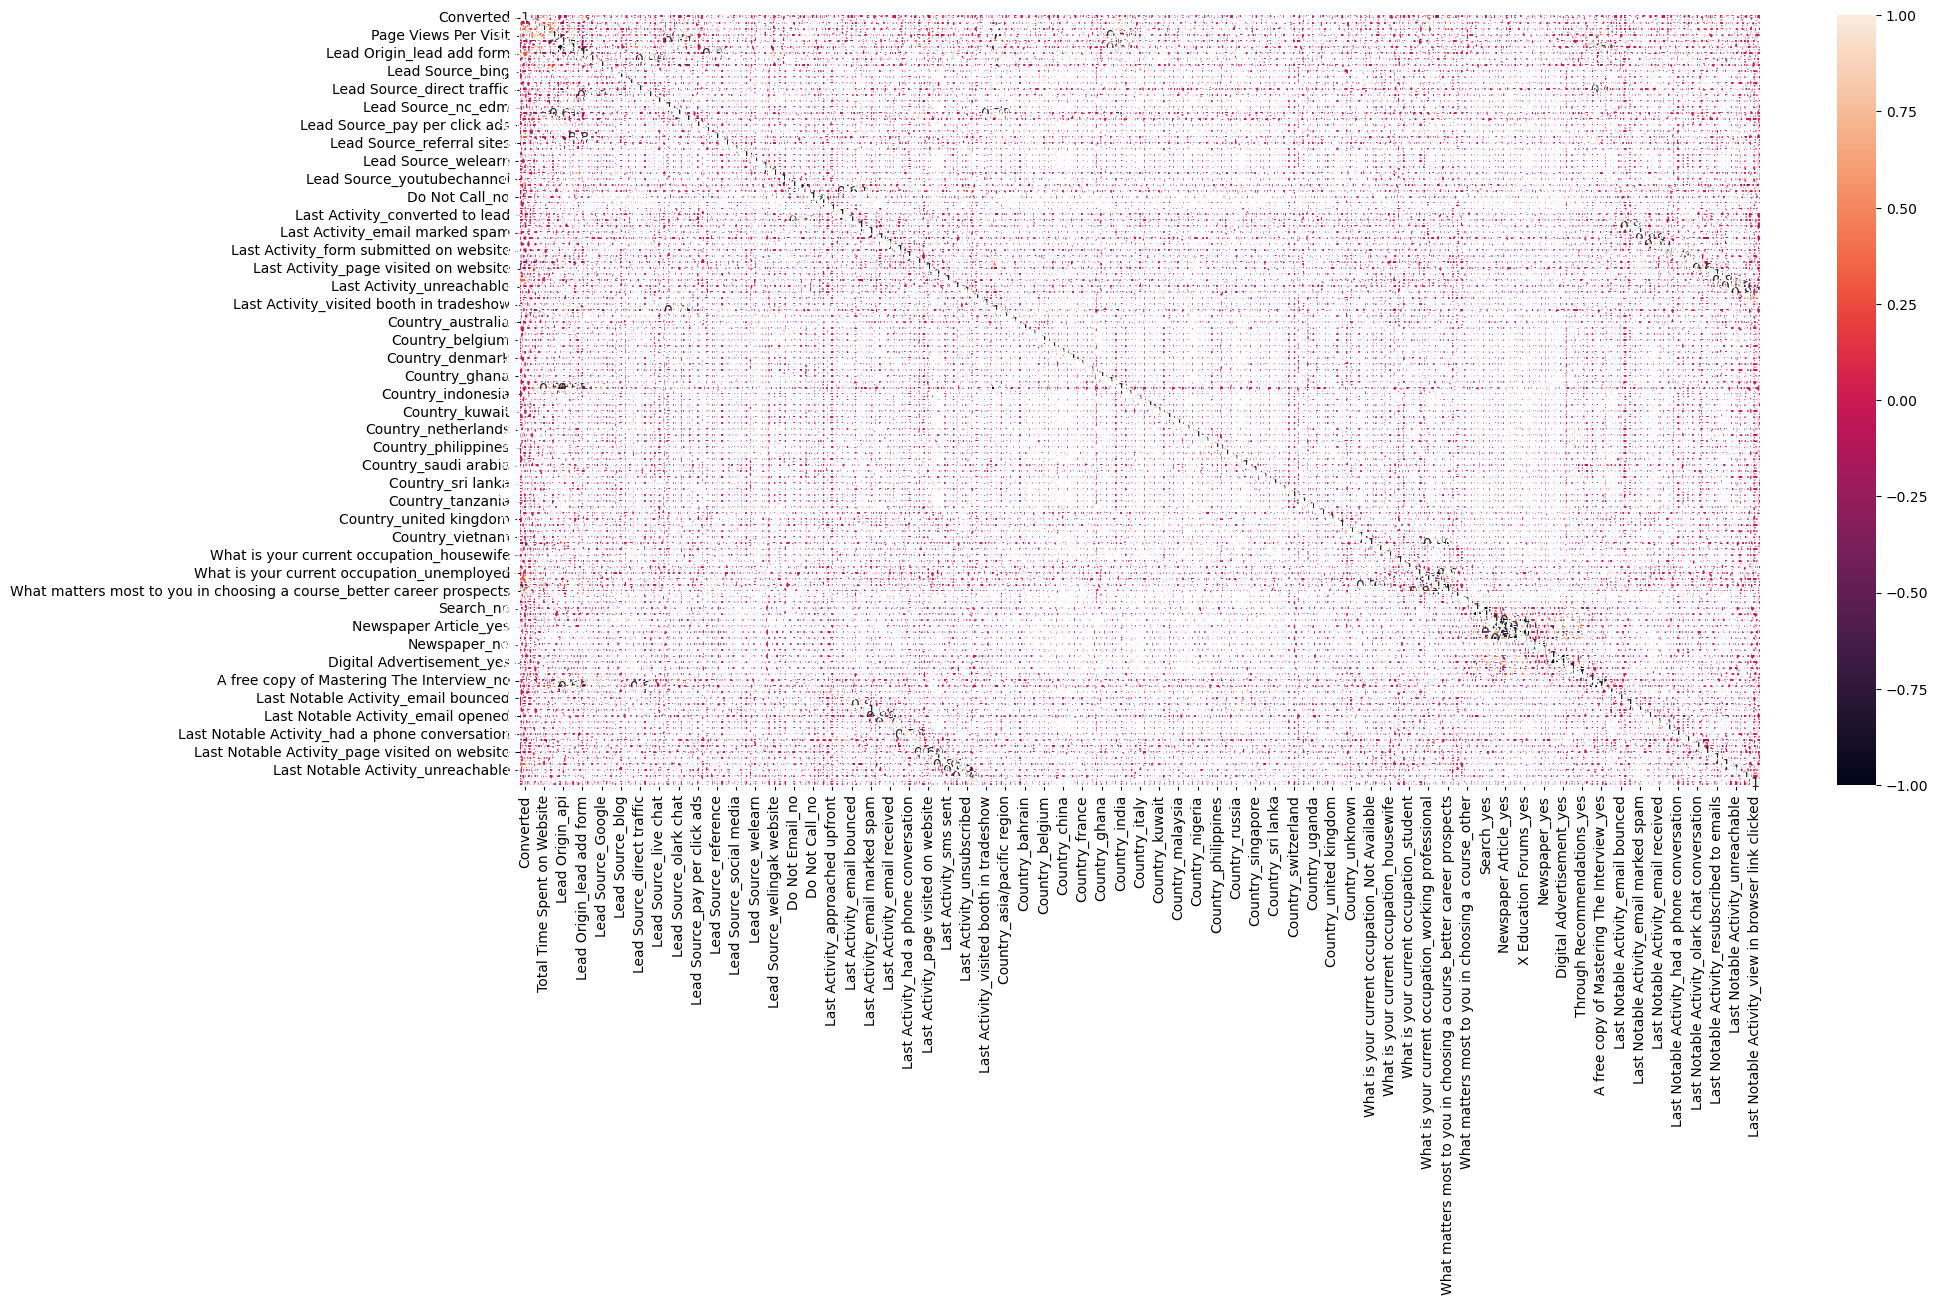

In [117]:
# Let's see the correlation matrix 
plt.figure(figsize = (20,10))        # Size of the figure
sns.heatmap(df.corr(),annot = True)
plt.show()

Since there are lots of variables we will do it after RFE

Step 5: Model Building

In [118]:
from sklearn.linear_model import LogisticRegression
logreg = LogisticRegression()

In [119]:
df.head()

,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Lead Origin_api,Lead Origin_landing page submission,Lead Origin_lead add form,Lead Origin_lead import,Lead Source_Google,Lead Source_bing,...,Last Notable Activity_form submitted on website,Last Notable Activity_had a phone conversation,Last Notable Activity_modified,Last Notable Activity_olark chat conversation,Last Notable Activity_page visited on website,Last Notable Activity_resubscribed to emails,Last Notable Activity_sms sent,Last Notable Activity_unreachable,Last Notable Activity_unsubscribed,Last Notable Activity_view in browser link clicked
0,0,0.0,0,0.0,1,0,0,0,0,0,...,0,0,1,0,0,0,0,0,0,0
1,0,5.0,674,2.5,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,1,2.0,1532,2.0,0,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,1.0,305,1.0,0,1,0,0,0,0,...,0,0,1,0,0,0,0,0,0,0
4,1,2.0,1428,1.0,0,1,0,0,1,0,...,0,0,1,0,0,0,0,0,0,0


In [121]:
from sklearn.feature_selection import RFE
rfe = RFE(estimator = logreg, n_features_to_select =  15)             # running RFE with 15 variables as output
rfe = rfe.fit(X_train, y_train)

In [122]:
rfe.support_

array([False,  True, False, False, False,  True, False, False, False,
       False, False, False, False, False, False,  True, False, False,
       False, False, False, False, False, False, False,  True, False,
       False,  True, False, False,  True,  True, False, False, False,
       False, False, False,  True,  True, False, False,  True, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False,  True,
       False, False, False,  True, False,  True, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False,  True, False, False, False, False, False,  True,
       False, False]

In [123]:
list(zip(X_train.columns, rfe.support_, rfe.ranking_))

[('TotalVisits', False, 67),
 ('Total Time Spent on Website', True, 1),
 ('Page Views Per Visit', False, 75),
 ('Lead Origin_api', False, 3),
 ('Lead Origin_landing page submission', False, 2),
 ('Lead Origin_lead add form', True, 1),
 ('Lead Origin_lead import', False, 106),
 ('Lead Source_Google', False, 50),
 ('Lead Source_bing', False, 95),
 ('Lead Source_blog', False, 68),
 ('Lead Source_click2call', False, 56),
 ('Lead Source_direct traffic', False, 47),
 ('Lead Source_facebook', False, 48),
 ('Lead Source_live chat', False, 76),
 ('Lead Source_nc_edm', False, 14),
 ('Lead Source_olark chat', True, 1),
 ('Lead Source_organic search', False, 49),
 ('Lead Source_pay per click ads', False, 64),
 ('Lead Source_press_release', False, 93),
 ('Lead Source_reference', False, 10),
 ('Lead Source_referral sites', False, 46),
 ('Lead Source_social media', False, 25),
 ('Lead Source_testone', False, 61),
 ('Lead Source_welearn', False, 110),
 ('Lead Source_welearnblog_home', False, 80),
 ('L

In [124]:
col = X_train.columns[rfe.support_]

In [125]:
X_train.columns[~rfe.support_]

Index(['TotalVisits', 'Page Views Per Visit', 'Lead Origin_api',
       'Lead Origin_landing page submission', 'Lead Origin_lead import',
       'Lead Source_Google', 'Lead Source_bing', 'Lead Source_blog',
       'Lead Source_click2call', 'Lead Source_direct traffic',
       ...
       'Last Notable Activity_email opened',
       'Last Notable Activity_email received',
       'Last Notable Activity_form submitted on website',
       'Last Notable Activity_modified',
       'Last Notable Activity_olark chat conversation',
       'Last Notable Activity_page visited on website',
       'Last Notable Activity_resubscribed to emails',
       'Last Notable Activity_sms sent', 'Last Notable Activity_unsubscribed',
       'Last Notable Activity_view in browser link clicked'],
      dtype='object', length=113)

In [126]:
# fitting the model
X_train_sm = sm.add_constant(X_train[col])
logm2 = sm.GLM(y_train,X_train_sm, family = sm.families.Binomial())
res = logm2.fit()
res.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:              Converted   No. Observations:                 6351
Model:                            GLM   Df Residuals:                     6335
Model Family:                Binomial   Df Model:                           15
Link Function:                  Logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -2569.6
Date:                Wed, 24 May 2023   Deviance:                       5139.2
Time:                        22:10:06   Pearson chi2:                 6.18e+03
No. Iterations:                    21   Pseudo R-squ. (CS):             0.4078
Covariance Type:            nonrobust                                         
=========================================================================================================================================
                                                                            coef    std err          z      P>|z|      [0.025      0.975]
-----------------------------------------------------------------------------------------------------------------------------------------
const                                                                    -2.3784      0.092    -25.929      0.000      -2.558      -2.199
Total Time Spent on Website                                               1.1341      0.041     27.745      0.000       1.054       1.214
Lead Origin_lead add form                                                 3.5732      0.221     16.171      0.000       3.140       4.006
Lead Source_olark chat                                                    1.4200      0.107     13.279      0.000       1.210       1.630
Lead Source_welingak website                                              1.9981      0.751      2.659      0.008       0.525       3.471
Do Not Email_yes                                                         -1.6376      0.172     -9.545      0.000      -1.974      -1.301
Last Activity_approached upfront                                         22.4495      2e+04      0.001      0.999   -3.92e+04    3.92e+04
Last Activity_converted to lead                                          -1.2852      0.225     -5.711      0.000      -1.726      -0.844
Last Activity_had a phone conversation                                    1.2902      1.157      1.115      0.265      -0.978       3.559
Last Activity_olark chat conversation                                    -1.3420      0.164     -8.180      0.000      -1.664      -1.020
Last Activity_sms sent                                                    1.2393      0.075     16.417      0.000       1.091       1.387
What is your current occupation_housewife                                22.6825   1.58e+04      0.001      0.999   -3.09e+04     3.1e+04
What is your current occupation_working professional                      2.5188      0.189     13.317      0.000       2.148       2.890
What matters most to you in choosing a course_better career prospects     1.3056      0.088     14.804      0.000       1.133       1.478
Last Notable Activity_had a phone conversation                            2.2870      1.608      1.422      0.155      -0.864       5.438
Last Notable Activity_unreachable                                         2.0225      0.495      4.084      0.000       1.052       2.993
=========================================================================================================================================
"""

Check for the VIF values of the feature variables

In [127]:
# Check for the VIF values of the feature variables. 
from statsmodels.stats.outliers_influence import variance_inflation_factor

In [128]:
# Create a dataframe that will contain the names of all the feature variables and their respective VIFs
vif = pd.DataFrame()
vif['Features'] = X_train[col].columns
vif['VIF'] = [variance_inflation_factor(X_train[col].values, i) for i in range(X_train[col].shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
7,Last Activity_had a phone conversation,3.41
13,Last Notable Activity_had a phone conversation,3.40
12,What matters most to you in choosing a course_...,1.82
1,Lead Origin_lead add form,1.63
2,Lead Source_olark chat,1.62
9,Last Activity_sms sent,1.50
8,Last Activity_olark chat conversation,1.36
3,Lead Source_welingak website,1.33
0,Total Time Spent on Website,1.31
11,What is your current occupation_working profes...,1.20


The VIF values seems fine so as per p-value removing 'Last Activity_Approached upfront'

In [131]:
col = col.drop('Last Activity_approached upfront', 1)
col

Index(['Total Time Spent on Website', 'Lead Origin_lead add form',
       'Lead Source_olark chat', 'Lead Source_welingak website',
       'Do Not Email_yes', 'Last Activity_converted to lead',
       'Last Activity_had a phone conversation',
       'Last Activity_olark chat conversation', 'Last Activity_sms sent',
       'What is your current occupation_housewife',
       'What is your current occupation_working professional',
       'What matters most to you in choosing a course_better career prospects',
       'Last Notable Activity_had a phone conversation',
       'Last Notable Activity_unreachable'],
      dtype='object')

In [132]:
# refitting the model again
X_train_sm = sm.add_constant(X_train[col])
logm2 = sm.GLM(y_train,X_train_sm, family = sm.families.Binomial())
res = logm2.fit()
res.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:              Converted   No. Observations:                 6351
Model:                            GLM   Df Residuals:                     6336
Model Family:                Binomial   Df Model:                           14
Link Function:                  Logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -2572.8
Date:                Wed, 24 May 2023   Deviance:                       5145.6
Time:                        22:13:27   Pearson chi2:                 6.19e+03
No. Iterations:                    21   Pseudo R-squ. (CS):             0.4072
Covariance Type:            nonrobust                                         
=========================================================================================================================================
                                                                            coef    std err          z      P>|z|      [0.025      0.975]
-----------------------------------------------------------------------------------------------------------------------------------------
const                                                                    -2.3793      0.092    -25.936      0.000      -2.559      -2.199
Total Time Spent on Website                                               1.1359      0.041     27.793      0.000       1.056       1.216
Lead Origin_lead add form                                                 3.5727      0.221     16.170      0.000       3.140       4.006
Lead Source_olark chat                                                    1.4304      0.107     13.392      0.000       1.221       1.640
Lead Source_welingak website                                              1.9988      0.751      2.660      0.008       0.526       3.472
Do Not Email_yes                                                         -1.6402      0.172     -9.561      0.000      -1.976      -1.304
Last Activity_converted to lead                                          -1.2891      0.225     -5.728      0.000      -1.730      -0.848
Last Activity_had a phone conversation                                    1.2863      1.158      1.111      0.267      -0.983       3.556
Last Activity_olark chat conversation                                    -1.3504      0.164     -8.233      0.000      -1.672      -1.029
Last Activity_sms sent                                                    1.2351      0.075     16.367      0.000       1.087       1.383
What is your current occupation_housewife                                22.6795   1.58e+04      0.001      0.999   -3.09e+04     3.1e+04
What is your current occupation_working professional                      2.5160      0.189     13.300      0.000       2.145       2.887
What matters most to you in choosing a course_better career prospects     1.3103      0.088     14.859      0.000       1.137       1.483
Last Notable Activity_had a phone conversation                            2.2892      1.608      1.423      0.155      -0.863       5.441
Last Notable Activity_unreachable                                         2.0200      0.495      4.078      0.000       1.049       2.991
=========================================================================================================================================
"""

In [133]:
# checking vif again
vif = pd.DataFrame()
vif['Features'] = X_train[col].columns
vif['VIF'] = [variance_inflation_factor(X_train[col].values, i) for i in range(X_train[col].shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
6,Last Activity_had a phone conversation,3.41
12,Last Notable Activity_had a phone conversation,3.40
11,What matters most to you in choosing a course_...,1.82
1,Lead Origin_lead add form,1.63
2,Lead Source_olark chat,1.62
8,Last Activity_sms sent,1.50
7,Last Activity_olark chat conversation,1.36
3,Lead Source_welingak website,1.33
0,Total Time Spent on Website,1.31
10,What is your current occupation_working profes...,1.20


In [135]:
col = col.drop('What is your current occupation_housewife', 1)
X_train_sm = sm.add_constant(X_train[col])
logm2 = sm.GLM(y_train,X_train_sm, family = sm.families.Binomial())
res = logm2.fit()
res.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:              Converted   No. Observations:                 6351
Model:                            GLM   Df Residuals:                     6337
Model Family:                Binomial   Df Model:                           13
Link Function:                  Logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -2577.0
Date:                Wed, 24 May 2023   Deviance:                       5154.0
Time:                        22:17:36   Pearson chi2:                 6.20e+03
No. Iterations:                     7   Pseudo R-squ. (CS):             0.4064
Covariance Type:            nonrobust                                         
=========================================================================================================================================
                                                                            coef    std err          z      P>|z|      [0.025      0.975]
-----------------------------------------------------------------------------------------------------------------------------------------
const                                                                    -2.3756      0.092    -25.914      0.000      -2.555      -2.196
Total Time Spent on Website                                               1.1354      0.041     27.812      0.000       1.055       1.215
Lead Origin_lead add form                                                 3.5912      0.221     16.279      0.000       3.159       4.024
Lead Source_olark chat                                                    1.4267      0.107     13.367      0.000       1.218       1.636
Lead Source_welingak website                                              1.9764      0.751      2.631      0.009       0.504       3.449
Do Not Email_yes                                                         -1.6435      0.172     -9.579      0.000      -1.980      -1.307
Last Activity_converted to lead                                          -1.2944      0.225     -5.752      0.000      -1.735      -0.853
Last Activity_had a phone conversation                                    1.2803      1.158      1.106      0.269      -0.989       3.550
Last Activity_olark chat conversation                                    -1.3539      0.164     -8.255      0.000      -1.675      -1.032
Last Activity_sms sent                                                    1.2297      0.075     16.304      0.000       1.082       1.377
What is your current occupation_working professional                      2.5114      0.189     13.275      0.000       2.141       2.882
What matters most to you in choosing a course_better career prospects     1.3131      0.088     14.896      0.000       1.140       1.486
Last Notable Activity_had a phone conversation                            2.2893      1.609      1.423      0.155      -0.863       5.442
Last Notable Activity_unreachable                                         2.0151      0.495      4.067      0.000       1.044       2.986
=========================================================================================================================================
"""

In [136]:
# checking vif again
vif = pd.DataFrame()
vif['Features'] = X_train[col].columns
vif['VIF'] = [variance_inflation_factor(X_train[col].values, i) for i in range(X_train[col].shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
6,Last Activity_had a phone conversation,3.41
11,Last Notable Activity_had a phone conversation,3.40
10,What matters most to you in choosing a course_...,1.82
1,Lead Origin_lead add form,1.63
2,Lead Source_olark chat,1.62
8,Last Activity_sms sent,1.50
7,Last Activity_olark chat conversation,1.36
3,Lead Source_welingak website,1.33
0,Total Time Spent on Website,1.31
9,What is your current occupation_working profes...,1.20


In [137]:
col = col.drop('Last Activity_had a phone conversation', 1)
X_train_sm = sm.add_constant(X_train[col])
logm2 = sm.GLM(y_train,X_train_sm, family = sm.families.Binomial())
res = logm2.fit()
res.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:              Converted   No. Observations:                 6351
Model:                            GLM   Df Residuals:                     6338
Model Family:                Binomial   Df Model:                           12
Link Function:                  Logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -2577.6
Date:                Wed, 24 May 2023   Deviance:                       5155.3
Time:                        22:19:52   Pearson chi2:                 6.20e+03
No. Iterations:                     7   Pseudo R-squ. (CS):             0.4063
Covariance Type:            nonrobust                                         
=========================================================================================================================================
                                                                            coef    std err          z      P>|z|      [0.025      0.975]
-----------------------------------------------------------------------------------------------------------------------------------------
const                                                                    -2.3743      0.092    -25.907      0.000      -2.554      -2.195
Total Time Spent on Website                                               1.1357      0.041     27.825      0.000       1.056       1.216
Lead Origin_lead add form                                                 3.5894      0.221     16.272      0.000       3.157       4.022
Lead Source_olark chat                                                    1.4255      0.107     13.359      0.000       1.216       1.635
Lead Source_welingak website                                              1.9765      0.751      2.631      0.009       0.504       3.449
Do Not Email_yes                                                         -1.6427      0.172     -9.572      0.000      -1.979      -1.306
Last Activity_converted to lead                                          -1.2969      0.225     -5.764      0.000      -1.738      -0.856
Last Activity_olark chat conversation                                    -1.3554      0.164     -8.264      0.000      -1.677      -1.034
Last Activity_sms sent                                                    1.2274      0.075     16.282      0.000       1.080       1.375
What is your current occupation_working professional                      2.5096      0.189     13.266      0.000       2.139       2.880
What matters most to you in choosing a course_better career prospects     1.3146      0.088     14.916      0.000       1.142       1.487
Last Notable Activity_had a phone conversation                            3.5674      1.119      3.189      0.001       1.375       5.760
Last Notable Activity_unreachable                                         2.0132      0.495      4.063      0.000       1.042       2.984
=========================================================================================================================================
"""

In [138]:
# checking vif again
vif = pd.DataFrame()
vif['Features'] = X_train[col].columns
vif['VIF'] = [variance_inflation_factor(X_train[col].values, i) for i in range(X_train[col].shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
9,What matters most to you in choosing a course_...,1.82
1,Lead Origin_lead add form,1.63
2,Lead Source_olark chat,1.62
7,Last Activity_sms sent,1.50
6,Last Activity_olark chat conversation,1.36
3,Lead Source_welingak website,1.33
0,Total Time Spent on Website,1.31
8,What is your current occupation_working profes...,1.20
4,Do Not Email_yes,1.05
5,Last Activity_converted to lead,1.05


VIF and p-value are good so we have got our model

In [ ]:
##Step 6: Prediction

In [139]:
# predicting on the train set
y_train_pred = res.predict(X_train_sm)
y_train_pred

3009    0.072003
1012    0.107098
9226    0.641983
4750    0.672459
7987    0.921213
          ...   
367     0.154744
82      0.866011
8199    0.939793
7077    0.247390
5754    0.555527
Length: 6351, dtype: float64

In [140]:
# reshaping the predicted
y_train_pred.values.reshape(-1)

array([0.07200287, 0.10709789, 0.64198323, ..., 0.93979291, 0.24738952,
       0.55552664])

In [141]:
# Data frame with given convertion rate and probablity of predicted ones
y_train_pred_final = pd.DataFrame({'Converted':y_train.values, 'Conversion_Prob':y_train_pred})
y_train_pred_final.head()

,Converted,Conversion_Prob
3009,0,0.072003
1012,0,0.107098
9226,0,0.641983
4750,1,0.672459
7987,1,0.921213


In [142]:
# Creating new column 'predicted' with 1 if Cconversion_Prob > 0.5 else 0
y_train_pred_final['predicted'] = y_train_pred_final.Conversion_Prob.map(lambda x: 1 if x > 0.5 else 0)
y_train_pred_final.head()

,Converted,Conversion_Prob,predicted
3009,0,0.072003,0
1012,0,0.107098,0
9226,0,0.641983,1
4750,1,0.672459,1
7987,1,0.921213,1


In [143]:
# Importing metrics from sklearn for evaluation
from sklearn import metrics

In [144]:
# Let's check the overall accuracy.
print(metrics.accuracy_score(y_train_pred_final.Converted, y_train_pred_final.predicted))

0.8135726657219335


In [ ]:
#Accuracy is 81% which is good

In [145]:
# Let's take a look at the confusion matrix  
confusion = metrics.confusion_matrix(y_train_pred_final.Converted, y_train_pred_final.predicted )
confusion

array([[3464,  441],
       [ 743, 1703]], dtype=int64)

In [148]:

TP = confusion[1,1] # true positive 
TN = confusion[0,0] # true negatives
FP = confusion[0,1] # false positives
FN = confusion[1,0] # false negatives



In [149]:
# Let's see the sensitivity of our logistic regression model
TP / float(TP+FN)

0.696238757154538

In [150]:
# Let us calculate specificity
TN / float(TN+FP)

0.887067861715749

In [151]:
# Calculate false postive rate - predicting churn when customer does not have churned
print(FP/ float(TN+FP))

0.11293213828425096


In [152]:
# positive predictive value 
print (TP / float(TP+FP))

0.7943097014925373


In [153]:
# Negative predictive value
print (TN / float(TN+ FN))

0.8233895887806038


At cutoff - 0.5
Accuracy : 81%
Senitivity: 69%
Specificity: 89%

In [ ]:
#Step 8: Plotting the ROC curve

In [154]:
def draw_roc( actual, probs ):
    fpr, tpr, thresholds = metrics.roc_curve( actual, probs,
                                              drop_intermediate = False )
    auc_score = metrics.roc_auc_score( actual, probs )
    plt.figure(figsize=(5, 5))
    plt.plot( fpr, tpr, label='ROC curve (area = %0.2f)' % auc_score )
    plt.plot([0, 1], [0, 1], 'k--')
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.05])
    plt.xlabel('False Positive Rate or [1 - True Negative Rate]')
    plt.ylabel('True Positive Rate')
    plt.title('Receiver operating characteristic example')
    plt.legend(loc="lower right")
    plt.show()

    return None

In [155]:
fpr, tpr, thresholds = metrics.roc_curve( y_train_pred_final.Converted, y_train_pred_final.Conversion_Prob, drop_intermediate = False )

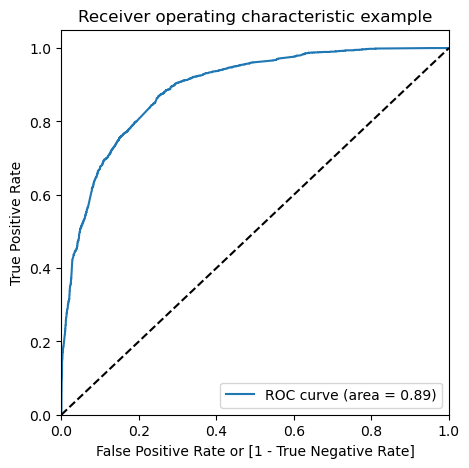

In [156]:
# drawing ROC curve
draw_roc(y_train_pred_final.Converted, y_train_pred_final.Conversion_Prob)

In [157]:
# Let's create columns with different probability cutoffs 
numbers = [float(x)/10 for x in range(10)]
for i in numbers:
    y_train_pred_final[i]= y_train_pred_final.Conversion_Prob.map(lambda x: 1 if x > i else 0)
y_train_pred_final.head()

,Converted,Conversion_Prob,predicted,0.0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9
3009,0,0.072003,0,1,0,0,0,0,0,0,0,0,0
1012,0,0.107098,0,1,1,0,0,0,0,0,0,0,0
9226,0,0.641983,1,1,1,1,1,1,1,1,0,0,0
4750,1,0.672459,1,1,1,1,1,1,1,1,0,0,0
7987,1,0.921213,1,1,1,1,1,1,1,1,1,1,1


In [158]:
# Now let's calculate accuracy sensitivity and specificity for various probability cutoffs.
cutoff_df = pd.DataFrame( columns = ['prob','accuracy','sensi','speci'])
from sklearn.metrics import confusion_matrix

# TP = confusion[1,1] # true positive 
# TN = confusion[0,0] # true negatives
# FP = confusion[0,1] # false positives
# FN = confusion[1,0] # false negatives

num = [0.0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9]
for i in num:
    cm1 = metrics.confusion_matrix(y_train_pred_final.Converted, y_train_pred_final[i] )
    total1=sum(sum(cm1))
    accuracy = (cm1[0,0]+cm1[1,1])/total1
    
    speci = cm1[0,0]/(cm1[0,0]+cm1[0,1])
    sensi = cm1[1,1]/(cm1[1,0]+cm1[1,1])
    cutoff_df.loc[i] =[ i ,accuracy,sensi,speci]
print(cutoff_df)

     prob  accuracy     sensi     speci
0.0   0.0  0.385136  1.000000  0.000000
0.1   0.1  0.604787  0.986100  0.365941
0.2   0.2  0.762715  0.917825  0.665557
0.3   0.3  0.791057  0.876942  0.737260
0.4   0.4  0.810424  0.766149  0.838156
0.5   0.5  0.813573  0.696239  0.887068
0.6   0.6  0.807589  0.636141  0.914981
0.7   0.7  0.782396  0.520850  0.946223
0.8   0.8  0.762557  0.432952  0.969014
0.9   0.9  0.713274  0.276778  0.986684


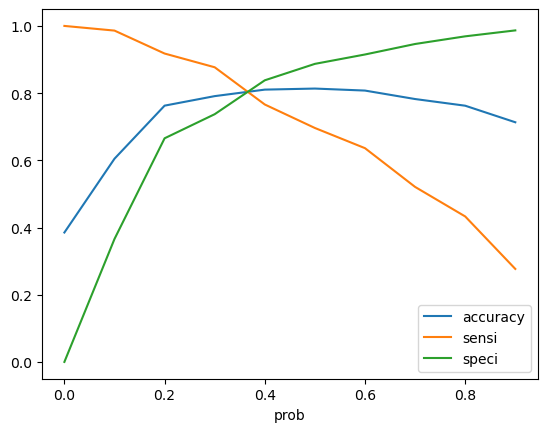

In [159]:
# Let's plot accuracy sensitivity and specificity for various probabilities.
cutoff_df.plot.line(x='prob', y=['accuracy','sensi','speci'])
plt.show()

From the curve above, 0.35 is the optimum point to take it as a cutoff probability.

In [160]:
y_train_pred_final['final_predicted'] = y_train_pred_final.Conversion_Prob.map( lambda x: 1 if x > 0.35 else 0)

y_train_pred_final.head()

,Converted,Conversion_Prob,predicted,0.0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9,final_predicted
3009,0,0.072003,0,1,0,0,0,0,0,0,0,0,0,0
1012,0,0.107098,0,1,1,0,0,0,0,0,0,0,0,0
9226,0,0.641983,1,1,1,1,1,1,1,1,0,0,0,1
4750,1,0.672459,1,1,1,1,1,1,1,1,0,0,0,1
7987,1,0.921213,1,1,1,1,1,1,1,1,1,1,1,1


In [161]:
# Let's check the overall accuracy.
metrics.accuracy_score(y_train_pred_final.Converted, y_train_pred_final.final_predicted)

0.8044402456306093

In [162]:
# confusion matrix again
confusion2 = metrics.confusion_matrix(y_train_pred_final.Converted, y_train_pred_final.final_predicted )
confusion2

array([[3154,  751],
       [ 491, 1955]], dtype=int64)

In [163]:
TP = confusion2[1,1] # true positive 
TN = confusion2[0,0] # true negatives
FP = confusion2[0,1] # false positives
FN = confusion2[1,0] # false negatives

In [164]:
# Let's see the sensitivity of our logistic regression model
TP / float(TP+FN)

0.7992641046606704

In [165]:
# Let us calculate specificity
TN / float(TN+FP)

0.8076824583866837

In [166]:
# Calculate false postive rate - predicting churn when customer does not have churned
print(FP/ float(TN+FP))

0.19231754161331627


In [167]:
# Positive predictive value 
print (TP / float(TP+FP))

0.7224685883222468


In [168]:
# Negative predictive value
print (TN / float(TN+ FN))

0.8652949245541838


At cutoff - 0.35
Accuracy : 80%
Senitivity: 79%
Specificity: 80%

In [ ]:
##Step 9: Making predictions on the test set

In [169]:
scaler = StandardScaler()

X_test[['TotalVisits','Total Time Spent on Website','Page Views Per Visit']] = scaler.fit_transform(X_test[['TotalVisits','Total Time Spent on Website','Page Views Per Visit']])

X_test.head()

,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Lead Origin_api,Lead Origin_landing page submission,Lead Origin_lead add form,Lead Origin_lead import,Lead Source_Google,Lead Source_bing,Lead Source_blog,...,Last Notable Activity_form submitted on website,Last Notable Activity_had a phone conversation,Last Notable Activity_modified,Last Notable Activity_olark chat conversation,Last Notable Activity_page visited on website,Last Notable Activity_resubscribed to emails,Last Notable Activity_sms sent,Last Notable Activity_unreachable,Last Notable Activity_unsubscribed,Last Notable Activity_view in browser link clicked
3271,0.143722,-0.591008,0.716169,1,0,0,0,1,0,0,...,0,0,0,0,0,0,0,0,0,0
1490,0.391416,1.894051,1.151248,0,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
7936,-0.351665,-0.743117,-0.153989,1,0,0,0,1,0,0,...,0,0,0,0,0,0,0,0,0,0
4216,-0.847051,-0.878732,-1.024147,0,0,1,0,0,0,0,...,0,0,1,0,0,0,0,0,0,0
3830,1.134496,-0.578179,2.456484,0,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [170]:
X_test = X_test[col]
X_test.head()

,Total Time Spent on Website,Lead Origin_lead add form,Lead Source_olark chat,Lead Source_welingak website,Do Not Email_yes,Last Activity_converted to lead,Last Activity_olark chat conversation,Last Activity_sms sent,What is your current occupation_working professional,What matters most to you in choosing a course_better career prospects,Last Notable Activity_had a phone conversation,Last Notable Activity_unreachable
3271,-0.591008,0,0,0,0,0,0,0,0,0,0,0
1490,1.894051,0,0,0,0,0,0,0,1,1,0,0
7936,-0.743117,0,0,0,0,0,0,0,0,0,0,0
4216,-0.878732,1,0,0,0,0,0,0,0,1,0,0
3830,-0.578179,0,0,0,0,0,0,0,0,0,0,0


In [171]:
# adding constant
X_test_sm = sm.add_constant(X_test)

In [172]:
#Making predictions 
y_test_pred = res.predict(X_test_sm)
y_test_pred[:10]

3271    0.045412
1490    0.973424
7936    0.038485
4216    0.822255
3830    0.046048
1800    0.647955
6507    0.363133
4821    0.345630
4223    0.940427
4714    0.327546
dtype: float64

In [173]:
# Converting y_pred to a dataframe which is an array
y_pred_1 = pd.DataFrame(y_test_pred)

In [174]:
# Let's see the head
y_pred_1.head()

,0
3271,0.045412
1490,0.973424
7936,0.038485
4216,0.822255
3830,0.046048


In [175]:
# Converting y_test to dataframe
y_test_df = pd.DataFrame(y_test)
# Remove index for both dataframes to append them side by side 
y_pred_1.reset_index(drop=True, inplace=True)
y_test_df.reset_index(drop=True, inplace=True)
# Append y_test_df and y_pred_df
y_pred_final = pd.concat([y_test_df, y_pred_1],axis=1)
# Renaming column 
y_pred_final= y_pred_final.rename(columns = {0 : 'Conversion_Prob'})
y_pred_final.head()

,Converted,Conversion_Prob
0,0,0.045412
1,1,0.973424
2,0,0.038485
3,1,0.822255
4,0,0.046048


In [ ]:
##Prediction with 0.35 cutoff

In [176]:
y_pred_final['final_predicted'] = y_pred_final.Conversion_Prob.map(lambda x: 1 if x > 0.35 else 0)

In [177]:
y_pred_final.head()

,Converted,Conversion_Prob,final_predicted
0,0,0.045412,0
1,1,0.973424,1
2,0,0.038485,0
3,1,0.822255,1
4,0,0.046048,0


In [178]:
# Let's check the overall accuracy.
metrics.accuracy_score(y_pred_final.Converted, y_pred_final.final_predicted)


0.8060962174072714

In [179]:
# confusion matrix
confusion2 = metrics.confusion_matrix(y_pred_final.Converted, y_pred_final.final_predicted )
confusion2

array([[1417,  317],
       [ 211,  778]], dtype=int64)

In [180]:
TP = confusion2[1,1] # true positive 
TN = confusion2[0,0] # true negatives
FP = confusion2[0,1] # false positives
FN = confusion2[1,0] # false negatives

In [181]:
# Let's see the sensitivity of our logistic regression model
TP / float(TP+FN)

0.7866531850353893

In [182]:
# Let us calculate specificity
TN / float(TN+FP)

0.8171856978085352

At cutoff - 0.35 on Test dataset
Accuracy : 80%
Senitivity: 78%
Specificity: 81%

In [ ]:
##Step 10: Precision and Recall

In [183]:
#Looking at the confusion matrix again
confusion = metrics.confusion_matrix(y_train_pred_final.Converted, y_train_pred_final.predicted )
confusion

array([[3464,  441],
       [ 743, 1703]], dtype=int64)

In [184]:
#Precision 
# TP / TP + FP
confusion[1,1]/(confusion[0,1]+confusion[1,1])

0.7943097014925373

In [185]:
#Recall
# TP / TP + FN
confusion[1,1]/(confusion[1,0]+confusion[1,1])

0.696238757154538

In [186]:
from sklearn.metrics import precision_score, recall_score
precision_score(y_train_pred_final.Converted, y_train_pred_final.predicted)

0.7943097014925373

In [187]:
recall_score(y_train_pred_final.Converted, y_train_pred_final.predicted)

0.696238757154538

In [188]:
##Precision and recall tradeoff
from sklearn.metrics import precision_recall_curve
y_train_pred_final.Converted, y_train_pred_final.predicted

(3009    0
 1012    0
 9226    0
 4750    1
 7987    1
        ..
 367     0
 82      1
 8199    0
 7077    0
 5754    0
 Name: Converted, Length: 6351, dtype: int64,
 3009    0
 1012    0
 9226    1
 4750    1
 7987    1
        ..
 367     0
 82      1
 8199    1
 7077    0
 5754    1
 Name: predicted, Length: 6351, dtype: int64)

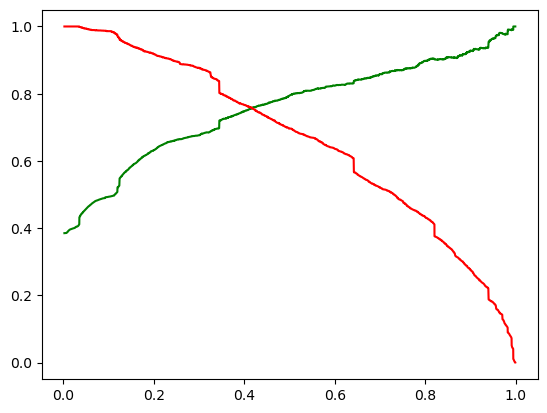

In [189]:
p, r, thresholds = precision_recall_curve(y_train_pred_final.Converted, y_train_pred_final.Conversion_Prob)
plt.plot(thresholds, p[:-1], "g-")
plt.plot(thresholds, r[:-1], "r-")
plt.show()

In [ ]:
##here we got precision of 79% and recall of 69% at cutoff 0.41

In [190]:
y_test_pred = res.predict(X_test_sm)
# Converting y_pred to a dataframe which is an array
y_pred_1 = pd.DataFrame(y_test_pred)
# Remove index for both dataframes to append them side by side 
y_pred_1.reset_index(drop=True, inplace=True)
y_test_df.reset_index(drop=True, inplace=True)
# Append y_test_df and y_pred_df
y_pred_final = pd.concat([y_test_df, y_pred_1],axis=1)
# Renaming column 
y_pred_final= y_pred_final.rename(columns = {0 : 'Conversion_Prob'})
y_pred_final.head()

,Converted,Conversion_Prob
0,0,0.045412
1,1,0.973424
2,0,0.038485
3,1,0.822255
4,0,0.046048


In [191]:
y_pred_final['final_predicted'] = y_pred_final.Conversion_Prob.map(lambda x: 1 if x > 0.41 else 0)
y_pred_final.head()

,Converted,Conversion_Prob,final_predicted
0,0,0.045412,0
1,1,0.973424,1
2,0,0.038485,0
3,1,0.822255,1
4,0,0.046048,0


In [192]:
# Let's check the overall accuracy.
metrics.accuracy_score(y_pred_final.Converted, y_pred_final.final_predicted)

0.8145427836944547

In [193]:
# confusion matrix
confusion2 = metrics.confusion_matrix(y_pred_final.Converted, y_pred_final.final_predicted )
confusion2

array([[1470,  264],
       [ 241,  748]], dtype=int64)

In [194]:
TP = confusion2[1,1] # true positive 
TN = confusion2[0,0] # true negatives
FP = confusion2[0,1] # false positives
FN = confusion2[1,0] # false negatives
# Let's see the sensitivity of our logistic regression model
TP / float(TP+FN)

0.756319514661274

In [195]:
# Let us calculate specificity
TN / float(TN+FP)

0.8477508650519031

At cutoff - 0.41
Accuracy : 81%
Senitivity: 76%
Specificity: 85%

In [196]:
# Importance
start = "\x1B[1;3m"
end = '\x1B[0m'
print(start+"-----------------------Feature Importance--------------------\n"+end)
print(res.params)

-----------------------Feature Importance--------------------

const                                                                   -2.374329
Total Time Spent on Website                                              1.135651
Lead Origin_lead add form                                                3.589406
Lead Source_olark chat                                                   1.425519
Lead Source_welingak website                                             1.976462
Do Not Email_yes                                                        -1.642694
Last Activity_converted to lead                                         -1.296919
Last Activity_olark chat conversation                                   -1.355375
Last Activity_sms sent                                                   1.227435
What is your current occupation_working professional                     2.509596
What matters most to you in choosing a course_better career prospects    1.314554
Last Notable Activity_had a phone c

CONCLUSION 

1.In the given data 39% of leads only got converted
2.The probability of lead getting converted is high when ‘Lead Origin’ is ‘Lead add form’
3.Large number of leads come from Google and direct traffic but referral sites convert most of the leads it gets, means giving referrals can lead to more lead conversion.
4.Leads opting for emailing option have more probability of getting converted.
5.Conversion rate is higher when the information is sent through sms.
6.Unemployed people have more conversion rate as well as more count.
7.The model gives accuracy of 81% with our selected cutoff of 0.5.
8.The optimal cutoff comes out to be 0.35 which gives the accuracy of 80% with sensitivity and specificity at 79% and 80% respectively.
9.Lead Origin_Lead Add Form, Last Notable Activity_Had a Phone ConversationWhat is your current occupation_Working Professional are the features which will increase the probability of lead conversion
10.Last Activity_Converted to Lead, Last Activity_Olark Chat Conversation.willdecres the probability of lead conversion